# Writing My First Web Scraper

In [6]:
from urllib.request import urlopen

html = urlopen('http://pythonscraping.com/pages/page1.html')
print(html.read()) # to get the html contents of the page

b'<html>\n<head>\n<title>A Useful Page</title>\n</head>\n<body>\n<h1>An Interesting Title</h1>\n<div>\nLorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.\n</div>\n</body>\n</html>\n'


## An Introduction to BeautifulSoup

BeautifulSoup tries to make sense of the nonsensical; it helps format and organize the messy web by fixing bad HTML and presenting us with easily traversable Python objects representing XML structures.

In [2]:
# pip install beautifulsoup4

Running BeautifulSoup

In [8]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('http://www.pythonscraping.com/pages/page1.html')
bs = BeautifulSoup(html.read(), 'html.parser')
print(bs.h1)

<h1>An Interesting Title</h1>


#### This HTML content is then transformed into a BeautifulSoup object, with the following structure:

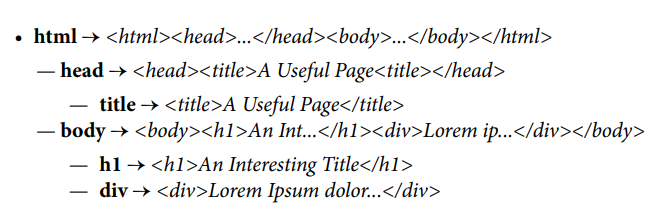

> Note that the h1 tag that you extract from the page is nested two layers deep into your BeautifulSoup object structure (html → body → h1).

> However, when you actually fetch it from the object, you call the h1 tag directly:

> In fact, any of the following function calls would produce the same output:


In [9]:
bs.h1

<h1>An Interesting Title</h1>

In [10]:
bs.body.h1

<h1>An Interesting Title</h1>

In [11]:
bs.html.h1

<h1>An Interesting Title</h1>

When you create a BeautifulSoup object, two arguments are passed in:

```bs = BeautifulSoup(html.read(), 'html.parser')```

The first is the HTML text the object is based on, and the second specifies the parser
that you want BeautifulSoup to use in order to create that object. 

## Another popular parser is lxml

In [12]:
# pip install lxml

In [13]:
bs = BeautifulSoup(html.read(), 'lxml') # with lxml parser

lxml has some advantages over html.parser in that it is generally better at parsing “messy” or malformed HTML code. Also faster than html parser.

## html5lib

html5lib is an extremely forgiving parser that takes even more initiative correcting broken HTML.

It also depends on an external dependency, and is slower than both lxml and html.parser.

> Despite this, it may be a good choice if you are working with messy or handwritten HTML sites.


In [15]:
# pip install html5lib

  Using cached html5lib-1.1-py2.py3-none-any.whl.metadata (16 kB)
Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [3]:
html = urlopen('http://pythonscraping.com/pages/page1.html')
bs = BeautifulSoup(html.read(), 'html5lib')

# Connecting Reliably and Handling Exceptions



The web is messy. Data is poorly formatted, websites go down, and closing tags go missing.

One of the most frustrating experiences in web scraping is to go to sleep with a scraper running, dreaming of all the data you’ll have in your database the next day—only to find that the scraper hit an error on some unexpected data format and stopped execution shortly after you stopped looking at the screen.

#### LoL Haha

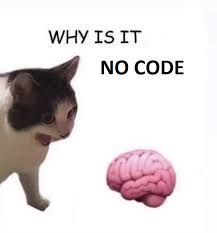

In situations like these, you might be tempted to curse the name of the developer who created the website

(and the oddly formatted data), but the person you should really be kicking is yourself, for not anticipating the exception in the first place!

In [4]:
html = urlopen('http://www.pythonscraping.com/pages/page1.html')

Two main things can go wrong in this line:
- The page is not found on the server (or there was an error in retrieving it).
- The server is not found.

In [5]:
from urllib.request import urlopen
from urllib.error import HTTPError

try:
    html = urlopen('http://www.pythonscraping.com/pages/page1.html')
except HTTPError as e:
    print(e) 
    # return null, break or do some other "plan B"

This HTTP error may be “404 Page Not Found,” “500 Internal Server Error,” and so forth.

If the server is not found at all (if, say, http://www.pythonscraping.com is down, or the URL is mistyped), urlopen will throw an URLError.

In [6]:
from urllib.request import urlopen
from urllib.error import HTTPError
from urllib.error import URLError
try:
    html = urlopen('https://pythonscrapingthisurldoesnotexist.com')
except HTTPError as e:
    print(e)
except URLError as e:
    print('The server could not be found!')
else:
    print('It Worked!')

The server could not be found!
